# Backend du TP ANAD : Compression des images en utilisant l'ACP 
## Réalisé par : Lamdani Wilem & Belkessa Linda (2CS SIQ3)

# Introduction à l'ACP
L'ACP est une ** technique de réduction de dimensionnalité ** utilisée dans l'analyse de données et l'apprentissage automatique.

Pourquoi avons-nous besoin de ACP ? <br/>
Dans l'analyse de données, nous pouvons facilement visualiser un jeu de données avec jusqu'à trois caractéristiques, mais pour quatre caractéristiques ou plus, nous ne pouvons pas considérer les données, nous utilisons donc PCA pour le rendre en 3-D, 2-D ou même 1-D **avec un minimum perte de distribution inhérente des données**.

Dans l'apprentissage automatique, un jeu de données avec un grand nombre de caractéristiques est coûteux en calcul et donc ACP peut être utilisé pour réduire le nombre de caractéristiques qui ne représentent pas beaucoup de variance dans l'ensemble de données.

> Dans ce TP nous cherchons à compresser des données en minimisant les pertes et favorisant la reconstruction de bonne qualité.

# Impléméntation de l'ACP :
Présentation des fonctions implémentées :

1. `center_data()` - pour mettre les données à l'échelle de manière à ce que chaque entité de l'ensemble de données ait une moyenne de 0
2. `principal_component()` - renvoie les PC (vecteurs propres) des données
3. `project_onto_PC()` - effectuer une réduction de dimensionnalité en projetant les données sur le PC
4. `plot_PC - used()` pour visualiser l'image résultante après réduction de la dimensionnalité
5. `reconstruct_PC()` - reconstruire une image à partir de PCA

In [18]:
import numpy as np
import matplotlib.pyplot as plt


def project_onto_PC(X, pcs, n_components):
    """
     Étant donné les vecteurs de composantes principales pcs = principal_components(X)
     cette fonction renvoie un nouveau tableau de données dans lequel chaque échantillon de X
     a été projeté sur les premiers n_components composants principaux.

     Arguments :
         X - n x d Tableau Numpy
         pcs - d x d Tableau Numpy avec chaque colonne comme vecteur propre trié en
         ordre décroissant de leurs valeurs propres correspondantes.
         n_components - (scalaire) composants principaux supérieurs
     Retour:
         projected_data - n x n_components Tableau Numpy avec n échantillons et fonctionnalités n_components
     """
     # Étape 1 : Centrez les données de telle sorte que pour chaque caractéristique d'un échantillon, moyenne = 0.
     # Cette étape est souvent appelée mise à l'échelle
    X_bar = center_data(X)

    # Etape 2 : Projection sur les composants principaux n_components.
    n_pcs = pcs[:, :n_components]
    projected_data = X_bar @ n_pcs

    return projected_data



def center_data(X):
   
    feature_means = X.mean(axis=0)
    return(X - feature_means)


def principal_components(X):
    """
     Renvoie une version centrée des données, où chaque caractéristique a maintenant une moyenne = 0
     Exemple : X = [[2, 2, 1],
                            [0, 1, 2],
                            [1, 0, 3]]
                   
                    moyenne = [1, 1, 2]
              centered_X = [[2 - 1, 2 - 1, 1 - 2],
                            [0 - 1, 1 - 1, 2 - 2],
                            [1 - 1, 0 - 1, 3 - 2]]

     Arguments :
         X - n x d Tableau NumPy de n points de données, chacun avec d caractéristiques

     Retour:
         n x d Tableau NumPy X' où pour chaque i = 1, ..., n et j = 1, ..., d :
         X'[i][j] = X[i][j] - signifie[j]
     """
    
    centered_data = center_data(X)  
    scatter_matrix = centered_data.T @ centered_data
    eigen_values, eigen_vectors = np.linalg.eig(scatter_matrix)
    # Trier les valeurs propres par ordre décroissant :
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]
    return eigen_vectors


def plot_PC(X, pcs, labels):
    """
     Étant donné les vecteurs composants principaux comme colonnes de la matrice pcs,
     cette fonction projette chaque échantillon en X sur les deux premiers composants principaux
     et produit un nuage de points où les points sont marqués avec le chiffre représenté dans
     l'image correspondante.
     labels = un tableau numpy contenant les chiffres correspondant à chaque image dans X.
     
     """
    pc_data = project_onto_PC(X, pcs, n_components=2)
    text_labels = [str(z) for z in labels.tolist()]
    fig, ax = plt.subplots()
    ax.scatter(pc_data[:, 0], pc_data[:, 1], alpha=0, marker=".")
    for i, txt in enumerate(text_labels):
        ax.annotate(txt, (pc_data[i, 0], pc_data[i, 1]))
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    plt.show()

def reconstruct_PC(x_pca, pcs, n_components, X):
    """
     Étant donné les vecteurs composants principaux comme colonnes de la matrice pcs,
     cette fonction reconstruit une image unique à partir de son composant principal
     représentation, x_pca.
     X = les données d'origine auxquelles l'ACP a été appliquée pour obtenir des pièces.
     """
     # X - (X - mu_X) = mu_X = caractéristique signifie
     # Alternativement,
     # feature_means = X.mean(axis=0)
        
    feature_means = X - center_data(X)
    feature_means = feature_means[0, :]
    x_reconstructed = np.dot(x_pca, pcs[:, range(n_components)].T) + feature_means
    return x_reconstructed

# Analyse des données
Pour la démonstration de la capacité de l'ACP, nous utilisons le jeu de données MNIST avec 60,000 images de `taille - 28x28`. Chaque image se compose de « 28 * 28 = 784 entités », et en utilisant ACP ** on va réduire le nombre d'entités à seulement 2 ** afin que nous puissions visualiser l'ensemble de données.

Même lorsque nous réduisons les données à une dimension aussi faible, les données contiendront toujours un certain niveau de structure. C'est la puissance de l'ACP.

Après, pour la compression, nous aurons à augmenter le nombres des axes pris pour garentir une meilleure reconstruction.

Les données de mnist chargées avec dimensions : (60000, 28, 28)
Dimensions des données originales : (28, 28)
Dimension des données projetées: (2,)


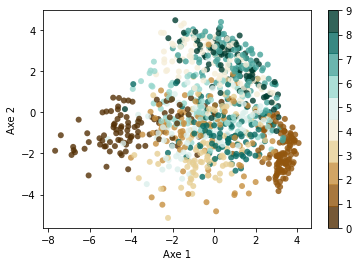

In [29]:
from keras.datasets import mnist
(data, labels), (_, _) = mnist.load_data()
# Mise à l'échelle
data = data.astype('float') / 255
print(f"Les données de mnist chargées avec dimensions : {data.shape}")

n_components=2
flatten_data = data.reshape((60000, 28*28))
pcs = principal_components(flatten_data)
pca_data = project_onto_PC(flatten_data, pcs, n_components)
print(f"Dimensions des données originales : {data[0].shape}")
print(f"Dimension des données projetées: {pca_data[0].shape}")

plt.scatter(pca_data[:1000, 0], pca_data[:1000, 1],
            c=labels[:1000], edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('BrBG', 10))
plt.xlabel('Axe 1')
plt.ylabel('Axe 2')
plt.colorbar();

# Choisir du nombre de composants
Pour cette tâche, on utilise le `sklearn.decomposition.PCA` pour obtenir `explained_variance_ratio_` 

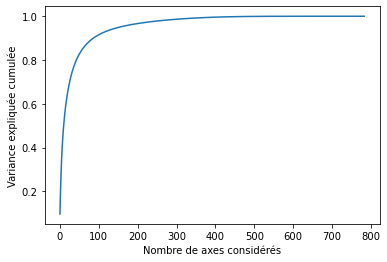

In [31]:
from sklearn.decomposition import PCA
pca = PCA().fit(flatten_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de axes considérés')
plt.ylabel('Variance expliquée cumulée');

**Comme on peut le voir, en utilisant seulement 100 composants sur 784, nous pouvons conserver plus de 90 % de la variance dans les données**

### Reconstruction d'une image avec 30 composantes prises

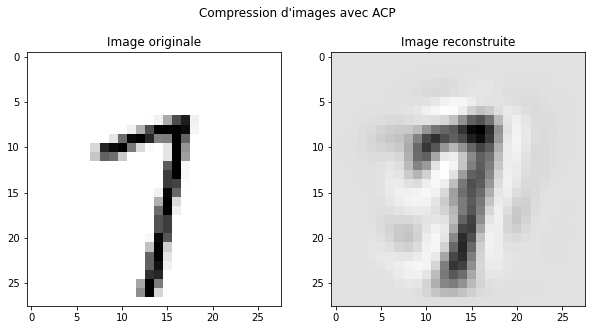

In [39]:
n_components=30
pcs = principal_components(flatten_data)
pca_data = project_onto_PC(flatten_data, pcs, n_components)

reduced_image = reconstruct_PC(pca_data[42], pcs, n_components, flatten_data)
reduced_image = reduced_image.reshape((28, 28))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(data[42], cmap='Greys')
ax[1].imshow(reduced_image, cmap='Greys')
ax[0].set_title("Image originale")
ax[1].set_title("Image reconstruite")
fig.suptitle("Compression d'images avec ACP");

### Reconstruction d'une image avec 100 composantes prises

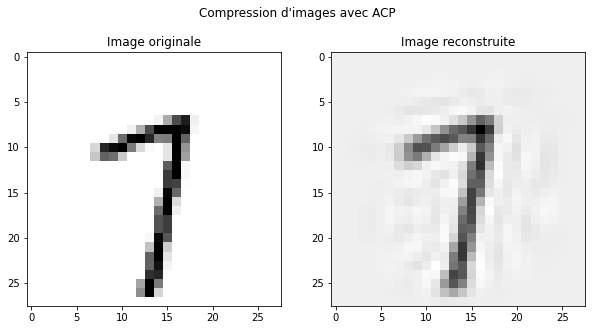

In [37]:
n_components=100
pcs = principal_components(flatten_data)
pca_data = project_onto_PC(flatten_data, pcs, n_components)

reduced_image = reconstruct_PC(pca_data[42], pcs, n_components, flatten_data)
reduced_image = reduced_image.reshape((28, 28))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(data[42], cmap='Greys')
ax[1].imshow(reduced_image, cmap='Greys')
ax[0].set_title("Image originale")
ax[1].set_title("Image reconstruite")
fig.suptitle("Compression d'images avec ACP");

# Conclusion 
L'image originale pourrait être reconstruite si nous utilisions tous les PC, mais ici on a utilisé que 100 ou moins (30 par exemple) Composantes principales et comme vous pouvez le voir, l'image reconstruite ressemble toujours au chiffre "1".

Réduire la dimensionnalité à 30 dimensions voir meme moins, aura toujours une bonne structure pour être utile dans un algorithme d'apprentissage automatique. Cela permettra d'économiser beaucoup de coûts de calcul, en particulier dans le cas où la dimensionnalité des données est très élevée. L'ACP améliore souvent la précision en éliminant les caractéristiques non pertinentes des données.